Supervised Learning using Support Vector Machines

In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part1.csv')
df2 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part2.csv')
df3 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part3.csv')
df4 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part4.csv')
df5 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part5.csv')
df6 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part6.csv')
df7 = pd.read_csv('./dataset/UWB-LOS-NLOS-Data-Set/dataset/uwb_dataset_part7.csv')

combined_df = pd.concat([df, df2, df3, df4, df5, df6, df7])

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Select the features to be used for Support Vector Classification
X = combined_df[['RANGE', 'FP_AMP1', 'CIR_PWR']]
Y = combined_df['NLOS']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3)


In [23]:
# Create a SVM Classifier with the kernel of radial basis function (RBF) for non-linear hyperplane
clf = SVC(kernel = 'rbf')

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

In [24]:
# Model Accuracy: How often is the classifier correct
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.7856349206349207
Precision: 0.8680484301251795
Recall: 0.6727099236641222


Confusion Matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model. It displays the number of true positives, true negatives, false positives, and false negatives. This matrix aids in analyzing model performance, identifying misclassifications, and improving predictive accuracy.

![alt text](https://av-eks-blogoptimized.s3.amazonaws.com/Basic-Confusion-matrix.png)

True Positive
- The predicted value matches the actual value, or the predicted class matches the actual class

True Negative
- The predicted value matches the actual value, or the predicted class matches the actual class

False Positive
- The predicted value was falsely predicted
- The actual value was negative, but the model predicted a positive value

False Negative
- The predicted value was falsely predicted
- The actual value was positive, but the model predicted a negative value

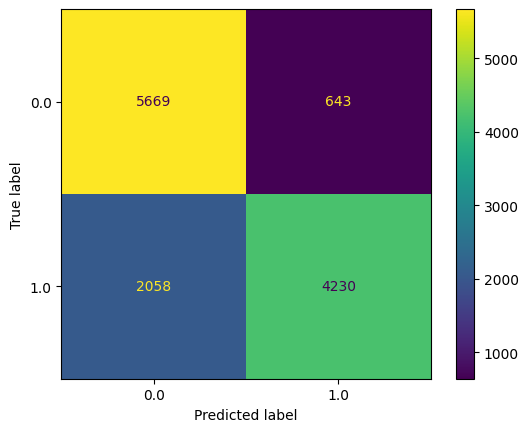

In [25]:
import matplotlib.pyplot as plt

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()